In [1]:
%matplotlib inline

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

# People's Taste in Alcohol
## An exploration of beer and wine ratings

## Author: Yordan Darakchiev

### Abstract
TODO

### Getting data

In [3]:
beer_reviews = pd.read_csv("data/beer_reviews.csv")

In [4]:
beer_reviews.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [5]:
beer_reviews.shape

(1586614, 13)

In [6]:
beer_reviews = beer_reviews[["beer_beerid", "brewery_id", "brewery_name",
                            "review_profilename", "review_time",
                            "beer_style", "beer_name", "beer_abv",
                            "review_overall", "review_aroma", "review_appearance", "review_palate", "review_taste"]]

In [7]:
beer_reviews

,beer_beerid,brewery_id,brewery_name,review_profilename,review_time,beer_style,beer_name,beer_abv,review_overall,review_aroma,review_appearance,review_palate,review_taste
0,47986,10325,Vecchio Birraio,stcules,1234817823,Hefeweizen,Sausa Weizen,5.0,1.5,2.0,2.5,1.5,1.5
1,48213,10325,Vecchio Birraio,stcules,1235915097,English Strong Ale,Red Moon,6.2,3.0,2.5,3.0,3.0,3.0
2,48215,10325,Vecchio Birraio,stcules,1235916604,Foreign / Export Stout,Black Horse Black Beer,6.5,3.0,2.5,3.0,3.0,3.0
3,47969,10325,Vecchio Birraio,stcules,1234725145,German Pilsener,Sausa Pils,5.0,3.0,3.0,3.5,2.5,3.0
4,64883,1075,Caldera Brewing Company,johnmichaelsen,1293735206,American Double / Imperial IPA,Cauldron DIPA,7.7,4.0,4.5,4.0,4.0,4.5
5,52159,1075,Caldera Brewing Company,oline73,1325524659,Herbed / Spiced Beer,Caldera Ginger Beer,4.7,3.0,3.5,3.5,3.0,3.5
6,52159,1075,Caldera Brewing Company,Reidrover,1318991115,Herbed / Spiced Beer,Caldera Ginger Beer,4.7,3.5,3.5,3.5,4.0,4.0
7,52159,1075,Caldera Brewing Company,alpinebryant,1306276018,Herbed / Spiced Beer,Caldera Ginger Beer,4.7,3.0,2.5,3.5,2.0,3.5
8,52159,1075,Caldera Brewing Company,LordAdmNelson,1290454503,Herbed / Spiced Beer,Caldera Ginger Beer,4.7,4.0,3.0,3.5,3.5,4.0
9,52159,1075,Caldera Brewing Company,augustgarage,1285632924,Herbed / Spiced Beer,Caldera Ginger Beer,4.7,4.5,3.5,5.0,4.0,4.0


In [8]:
beer_reviews.dtypes

beer_beerid             int64
brewery_id              int64
brewery_name           object
review_profilename     object
review_time             int64
beer_style             object
beer_name              object
beer_abv              float64
review_overall        float64
review_aroma          float64
review_appearance     float64
review_palate         float64
review_taste          float64
dtype: object

In [9]:
beer_reviews.review_time.head()

0    1234817823
1    1235915097
2    1235916604
3    1234725145
4    1293735206
Name: review_time, dtype: int64

In [10]:
beer_reviews.review_time = pd.to_datetime(beer_reviews.review_time, unit = "s")

In [11]:
beer_reviews.dtypes

beer_beerid                    int64
brewery_id                     int64
brewery_name                  object
review_profilename            object
review_time           datetime64[ns]
beer_style                    object
beer_name                     object
beer_abv                     float64
review_overall               float64
review_aroma                 float64
review_appearance            float64
review_palate                float64
review_taste                 float64
dtype: object

In [12]:
beer_reviews.review_time.min(), beer_reviews.review_time.max()

(Timestamp('1996-08-22 00:00:01'), Timestamp('2012-01-11 12:35:48'))

In [13]:
review_counts_by_year = beer_reviews.groupby(beer_reviews.review_time.dt.year).size()
review_counts_by_year

review_time
1996         1
1998       133
1999        86
2000       119
2001      1999
2002     23140
2003     56958
2004     69701
2005     89116
2006    129648
2007    142404
2008    210099
2009    243402
2010    277072
2011    333072
2012      9664
dtype: int64

In [5]:
min_year, max_year = beer_reviews.review_time.min().year, beer_reviews.review_time.max().year

plt.figure(figsize = (12, 6))

plt.histogram(review_counts_by_year.index, review_counts_by_year, align='center')

plt.title("Number of ratings per year")
plt.xlabel("Year")
plt.ylabel("Ratings")
plt.xticks(range(min_year, max_year + 1), rotation='vertical')
plt.show()

NameError: name 'beer_reviews' is not defined

In [15]:
review_counts_by_month = beer_reviews.groupby(beer_reviews.review_time.dt.month).size()
review_counts_by_month

review_time
1     142123
2     122020
3     130983
4     121689
5     127503
6     120425
7     128448
8     136001
9     129376
10    135975
11    140558
12    151513
dtype: int64

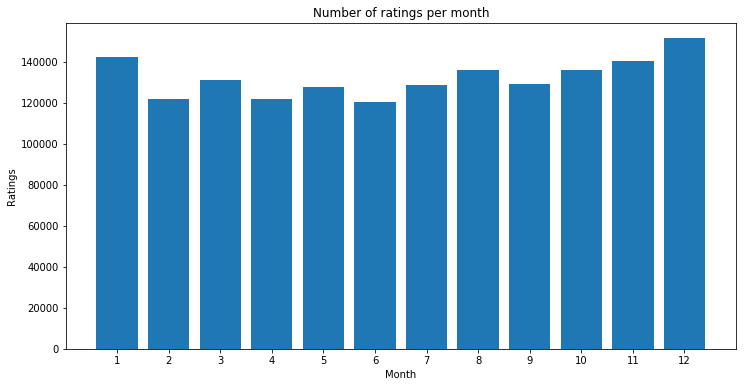

In [16]:
plt.figure(figsize = (12, 6))

plt.bar(review_counts_by_month.index, review_counts_by_month)

plt.title("Number of ratings per month")
plt.xlabel("Month")
plt.ylabel("Ratings")
plt.xticks(range(1, 12 + 1))
# plt.yscale("log")
plt.show()

In [17]:
beer_reviews_by_day = beer_reviews.groupby(beer_reviews.review_time.dt.date).size()

C:\Users\Yordan\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


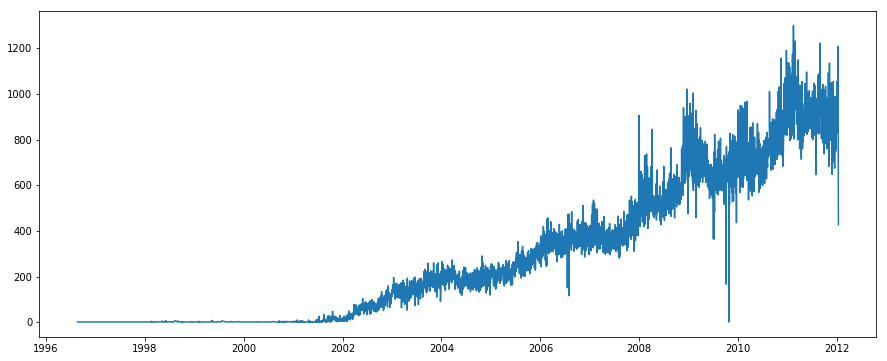

In [18]:
plt.figure(figsize = (15, 6))
plt.plot(beer_reviews_by_day.index, beer_reviews_by_day)
plt.show()

In [19]:
beer_reviews.describe().T

,count,mean,std,min,25%,50%,75%,max
beer_beerid,1586614.0,21712.794279,21818.335997,3.00,1717.0,13906.0,39441.0,77317.0
brewery_id,1586614.0,3130.099202,5578.103987,1.00,143.0,429.0,2372.0,28003.0
beer_abv,1518829.0,7.042387,2.322526,0.01,5.2,6.5,8.5,57.7
review_overall,1586614.0,3.815581,0.720622,0.00,3.5,4.0,4.5,5.0
review_aroma,1586614.0,3.735636,0.697617,1.00,3.5,4.0,4.0,5.0
review_appearance,1586614.0,3.841642,0.616093,0.00,3.5,4.0,4.0,5.0
review_palate,1586614.0,3.743701,0.682218,1.00,3.5,4.0,4.0,5.0
review_taste,1586614.0,3.792860,0.731970,1.00,3.5,4.0,4.5,5.0


In [20]:
beer_reviews.isna().any()

beer_beerid           False
brewery_id            False
brewery_name           True
review_profilename     True
review_time           False
beer_style            False
beer_name             False
beer_abv               True
review_overall        False
review_aroma          False
review_appearance     False
review_palate         False
review_taste          False
dtype: bool

In [21]:
beer_reviews.isna().sum() / len(beer_reviews) * 100

beer_beerid           0.000000
brewery_id            0.000000
brewery_name          0.000945
review_profilename    0.021934
review_time           0.000000
beer_style            0.000000
beer_name             0.000000
beer_abv              4.272306
review_overall        0.000000
review_aroma          0.000000
review_appearance     0.000000
review_palate         0.000000
review_taste          0.000000
dtype: float64

In [22]:
beers_with_missing_abv = beer_reviews[beer_reviews.beer_abv.isnull()]
beers_with_missing_abv.head()

,beer_beerid,brewery_id,brewery_name,review_profilename,review_time,beer_style,beer_name,beer_abv,review_overall,review_aroma,review_appearance,review_palate,review_taste
273,21241,1075,Caldera Brewing Company,RedDiamond,2004-12-21 22:29:55,American Stout,Cauldron Espresso Stout,NaN,3.0,3.0,3.0,4.0,3.0
430,20689,850,Moon River Brewing Company,cMonkey,2005-03-13 17:48:30,Scotch Ale / Wee Heavy,The Highland Stagger,NaN,3.5,4.0,4.5,3.5,3.5
603,20689,850,Moon River Brewing Company,aracauna,2004-11-09 22:20:19,Scotch Ale / Wee Heavy,The Highland Stagger,NaN,4.0,3.5,4.0,3.5,3.5
733,54723,1075,Caldera Brewing Company,plaid75,2009-12-13 03:12:01,American IPA,Alpha Beta,NaN,4.0,4.0,4.0,4.0,4.0
798,42964,1075,Caldera Brewing Company,grumpy,2008-05-31 02:34:28,American Double / Imperial Stout,Imperial Stout,NaN,4.5,4.5,4.0,4.0,4.5


In [23]:
print("Total number of breweries: {}".format(len(beer_reviews.brewery_name.unique())))
print("Number of breweries with missing data for beer ABV: {}".format(len(beers_with_missing_abv.brewery_name.unique())))

Total number of breweries: 5743
Number of breweries with missing data for beer ABV: 2779


In [24]:
beers_with_missing_abv.review_time.max()

Timestamp('2012-01-11 06:35:37')

In [25]:
beers_with_known_abv = beer_reviews[~beer_reviews.beer_abv.isnull()]

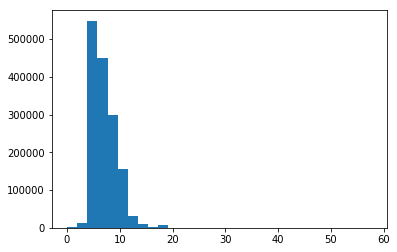

In [26]:
plt.hist(beers_with_known_abv.beer_abv, bins = 30)
plt.show()

In [27]:
len(beer_reviews[beer_reviews.beer_abv == 0])

0

In [28]:
LOW_ALCOHOL_THRESHOLD = 20
beers_with_low_abv = beer_reviews[beer_reviews.beer_abv <= LOW_ALCOHOL_THRESHOLD]
beers_with_high_abv = beer_reviews[beer_reviews.beer_abv > LOW_ALCOHOL_THRESHOLD]

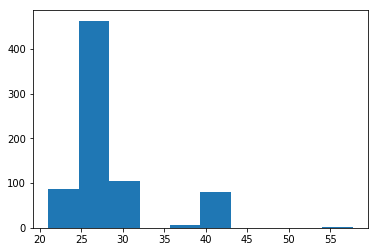

In [29]:
plt.hist(beers_with_high_abv.beer_abv)
plt.show()

In [30]:
beer_reviews[beer_reviews.beer_abv == beer_reviews.beer_abv.max()]

,beer_beerid,brewery_id,brewery_name,review_profilename,review_time,beer_style,beer_name,beer_abv,review_overall,review_aroma,review_appearance,review_palate,review_taste
12919,73368,6513,Schorschbräu,kappldav123,2011-09-23 12:28:21,Eisbock,Schorschbräu Schorschbock 57%,57.7,4.0,4.0,4.0,4.0,3.5


In [31]:
beers_with_low_abv.beer_abv.mean()

7.0318344954258745

In [32]:
beers_with_low_abv.beer_abv.mode()

0    5.0
dtype: float64

In [33]:
beers_with_low_abv.beer_abv.median()

6.5

In [34]:
beers_with_low_abv.beer_abv.skew()

1.164489621689754

In [35]:
len(beer_reviews.beer_name.unique())

56857

In [36]:
len(beers_with_missing_abv.beer_name.unique())

14110

In [37]:
beers_with_missing_abv.beer_name.sample(5)

1207080      Almost Heaven Amber Ale
981049                  Bayern Amber
1092885            Frundsberg Dunkel
1067137         Boscos London Porter
585407     Chief Wawatam Steam Lager
Name: beer_name, dtype: object

In [38]:
beer_reviews[beer_reviews.beer_name == "Eclipse"]

,beer_beerid,brewery_id,brewery_name,review_profilename,review_time,beer_style,beer_name,beer_abv,review_overall,review_aroma,review_appearance,review_palate,review_taste
98517,75763,27632,Aztec Brewing Company,HopHead84,2011-11-27 17:32:36,Baltic Porter,Eclipse,6.4,4.0,4.0,4.0,4.0,4.0
717336,28720,10193,Blindmans Brewery,wl0307,2006-03-03 01:54:26,English Porter,Eclipse,4.2,3.5,4.5,4.0,3.5,3.5
1249958,43459,944,Commonwealth Brewery Ltd.,wcudwight,2008-06-30 04:06:02,American Adjunct Lager,Eclipse,NaN,2.5,3.0,2.0,2.5,2.5
1249968,43459,944,Commonwealth Brewery Ltd.,KeefD,2008-11-14 21:17:11,American Adjunct Lager,Eclipse,NaN,4.0,2.5,3.0,4.0,3.0
1427497,61110,235,Northampton Brewery,MA08,2010-08-24 18:45:31,American Black Ale,Eclipse,4.9,4.0,3.0,2.5,3.0,4.0
1427498,61110,235,Northampton Brewery,connecticutpoet,2010-08-17 03:08:52,American Black Ale,Eclipse,4.9,3.5,3.0,3.5,3.5,3.0


In [41]:
len(beer_reviews.beer_beerid.unique())

66055

In [66]:
top_beer_styles = beer_reviews.groupby("beer_style").size().sort_values(ascending = False).head(10)
top_beer_styles

beer_style
American IPA                        117586
American Double / Imperial IPA       85977
American Pale Ale (APA)              63469
Russian Imperial Stout               54129
American Double / Imperial Stout     50705
American Porter                      50477
American Amber / Red Ale             45751
Belgian Strong Dark Ale              37743
Fruit / Vegetable Beer               33861
American Strong Ale                  31945
dtype: int64

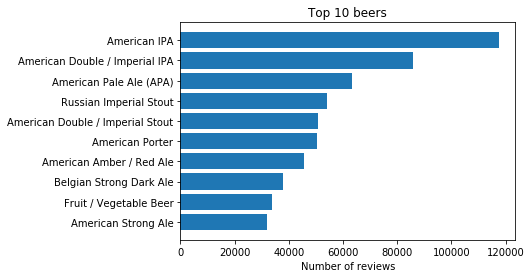

In [70]:
plt.barh(range(len(top_beer_styles.index)), top_beer_styles)

plt.title("Top 10 beers")
plt.xlabel("Number of reviews")
plt.yticks(range(len(top_beer_styles)), top_beer_styles.index)
plt.gca().invert_yaxis()
plt.show()

In [72]:
# "review_overall", "review_aroma", "review_appearance", "review_palate", "review_taste"

In [92]:
def plot_rating_histogram(column_name, show = True):
    alpha = 1 if show else 0.5
    plt.hist(beer_reviews["review_" + column_name], bins = 11, label = column_name, alpha = alpha)

    plt.title("Distribution of {} rating".format(column_name))
    plt.xlabel("Rating")
    plt.ylabel("Count")
    plt.legend()
    if show:
        plt.show()

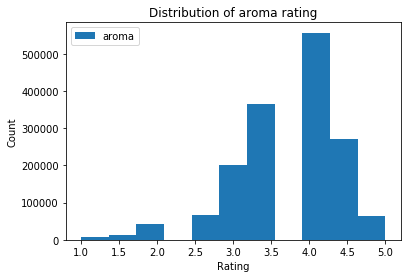

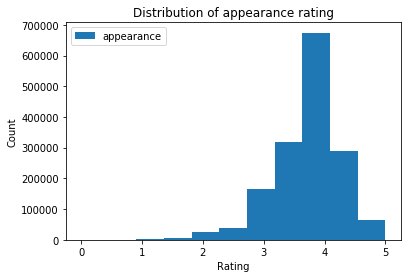

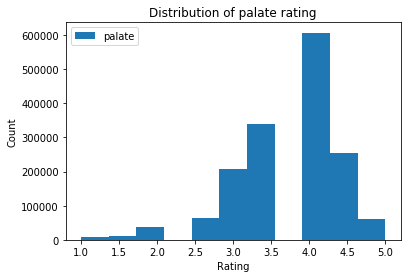

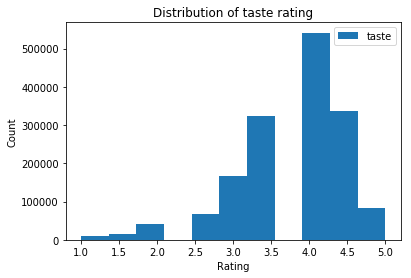

In [93]:
plot_rating_histogram("aroma")
plot_rating_histogram("appearance")
plot_rating_histogram("palate")
plot_rating_histogram("taste")

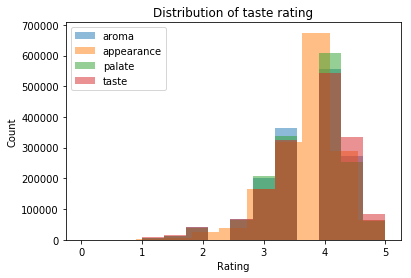

In [94]:
plot_rating_histogram("aroma", show = False)
plot_rating_histogram("appearance", show = False)
plot_rating_histogram("palate", show = False)
plot_rating_histogram("taste", show = False)

In [97]:
beer_reviews[beer_reviews.review_appearance == 0]

,beer_beerid,brewery_id,brewery_name,review_profilename,review_time,beer_style,beer_name,beer_abv,review_overall,review_aroma,review_appearance,review_palate,review_taste
37234,3806,1413,Desert Edge Brewery,beernut7,2002-08-24 14:01:10,Czech Pilsener,Pub Pils,4.0,0.0,2.0,0.0,3.0,2.0
39648,3804,1413,Desert Edge Brewery,beernut7,2002-08-25 09:19:18,Irish Dry Stout,Latter Days Stout,4.0,0.0,4.0,0.0,2.0,2.0
39667,3810,1413,Desert Edge Brewery,beernut7,2002-08-25 09:14:49,American Pale Ale (APA),Utah Pale Ale,4.0,0.0,3.0,0.0,2.0,2.0
653695,3788,1412,Red Rock Brewing Company,beernut7,2002-08-22 09:17:39,Hefeweizen,Red Rock Bavarian Weiss,4.0,0.0,2.0,0.0,2.5,2.0
653706,3787,1412,Red Rock Brewing Company,beernut7,2002-08-22 09:22:22,American Amber / Red Ale,Red Rock Amber Ale,4.0,0.0,3.0,0.0,2.5,3.5
653726,3822,1412,Red Rock Brewing Company,beernut7,2002-08-22 09:15:37,German Pilsener,Red Rock Pilsner,4.0,0.0,2.0,0.0,3.0,1.5
653740,3786,1412,Red Rock Brewing Company,beernut7,2002-08-22 09:20:39,Dunkelweizen,Red Rock Dunkel Weizen,4.0,0.0,2.0,0.0,2.5,2.0


In [98]:
beer_reviews[beer_reviews.review_overall == 0]

,beer_beerid,brewery_id,brewery_name,review_profilename,review_time,beer_style,beer_name,beer_abv,review_overall,review_aroma,review_appearance,review_palate,review_taste
37234,3806,1413,Desert Edge Brewery,beernut7,2002-08-24 14:01:10,Czech Pilsener,Pub Pils,4.0,0.0,2.0,0.0,3.0,2.0
39648,3804,1413,Desert Edge Brewery,beernut7,2002-08-25 09:19:18,Irish Dry Stout,Latter Days Stout,4.0,0.0,4.0,0.0,2.0,2.0
39667,3810,1413,Desert Edge Brewery,beernut7,2002-08-25 09:14:49,American Pale Ale (APA),Utah Pale Ale,4.0,0.0,3.0,0.0,2.0,2.0
653695,3788,1412,Red Rock Brewing Company,beernut7,2002-08-22 09:17:39,Hefeweizen,Red Rock Bavarian Weiss,4.0,0.0,2.0,0.0,2.5,2.0
653706,3787,1412,Red Rock Brewing Company,beernut7,2002-08-22 09:22:22,American Amber / Red Ale,Red Rock Amber Ale,4.0,0.0,3.0,0.0,2.5,3.5
653726,3822,1412,Red Rock Brewing Company,beernut7,2002-08-22 09:15:37,German Pilsener,Red Rock Pilsner,4.0,0.0,2.0,0.0,3.0,1.5
653740,3786,1412,Red Rock Brewing Company,beernut7,2002-08-22 09:20:39,Dunkelweizen,Red Rock Dunkel Weizen,4.0,0.0,2.0,0.0,2.5,2.0


In [99]:
beer_reviews = beer_reviews[beer_reviews.review_overall > 0]

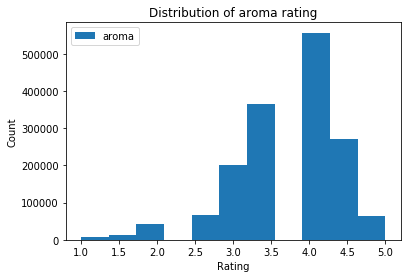

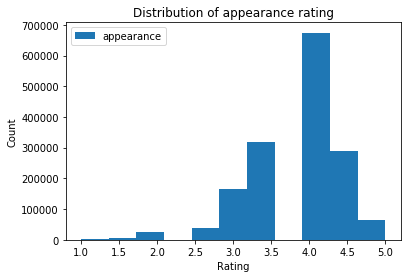

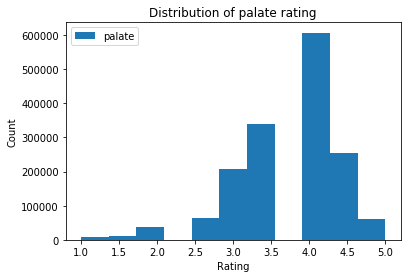

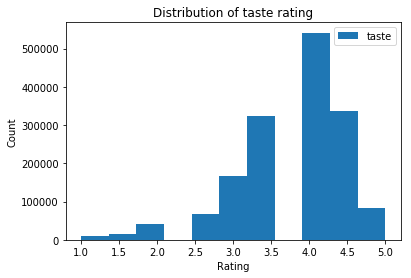

In [100]:
plot_rating_histogram("aroma")
plot_rating_histogram("appearance")
plot_rating_histogram("palate")
plot_rating_histogram("taste")

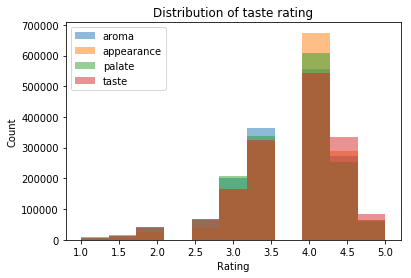

In [101]:
plot_rating_histogram("aroma", show = False)
plot_rating_histogram("appearance", show = False)
plot_rating_histogram("palate", show = False)
plot_rating_histogram("taste", show = False)

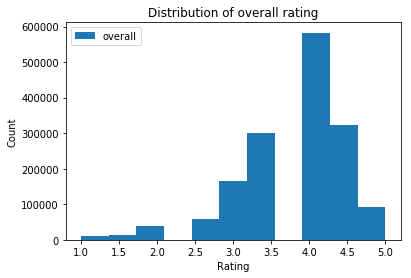

In [102]:
plot_rating_histogram("overall")

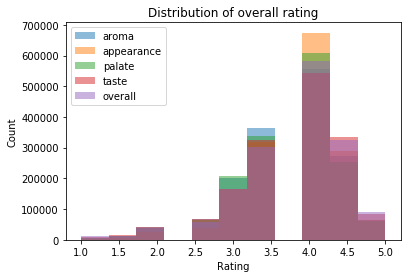

In [103]:
plot_rating_histogram("aroma", show = False)
plot_rating_histogram("appearance", show = False)
plot_rating_histogram("palate", show = False)
plot_rating_histogram("taste", show = False)
plot_rating_histogram("overall", show = False)

In [108]:
beer_reviews[["review_overall", "review_aroma", "review_appearance", "review_palate", "review_taste"]].corr()

,review_overall,review_aroma,review_appearance,review_palate,review_taste
review_overall,1.000000,0.616017,0.501661,0.701920,0.789822
review_aroma,0.616017,1.000000,0.561036,0.616946,0.716774
review_appearance,0.501661,0.561036,1.000000,0.566637,0.546972
review_palate,0.701920,0.616946,0.566637,1.000000,0.734132
review_taste,0.789822,0.716774,0.546972,0.734132,1.000000


In [110]:
review_overall_vs_aroma_crosstab = pd.crosstab(beer_reviews.review_overall, beer_reviews.review_aroma)
review_overall_vs_aroma_crosstab

review_aroma,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
review_overall,,,,,,,,,
1.0,3397,2051,2486,1005,982,475,428,97,33
1.5,1271,3080,3731,1782,1487,861,574,144,45
2.0,1064,3279,10935,7491,7400,4252,2910,730,164
2.5,401,1567,8149,14617,16157,9771,5995,1522,344
3.0,401,1345,8749,20223,56557,44179,26879,6106,1205
3.5,114,547,3816,11226,56768,113878,90173,22399,2896
4.0,135,447,3442,7535,45824,144134,265930,101293,14024
4.5,21,131,810,1917,11819,41363,138681,106127,23516
5.0,69,77,444,563,3034,6399,25812,33032,21890


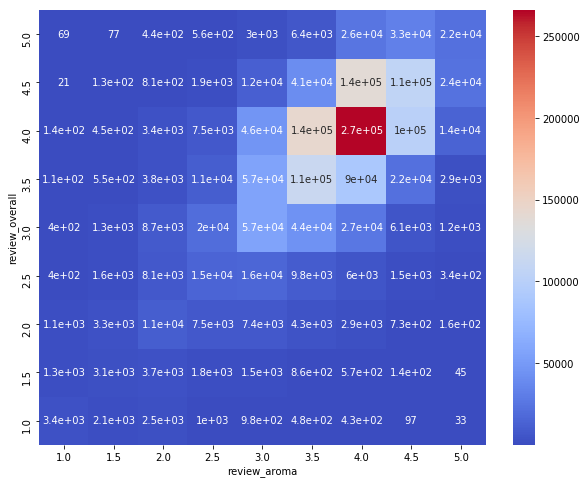

In [118]:
plt.figure(figsize = (10, 8))
ax = sns.heatmap(review_overall_vs_aroma_crosstab, annot = True, cmap = "coolwarm")
ax.invert_yaxis()

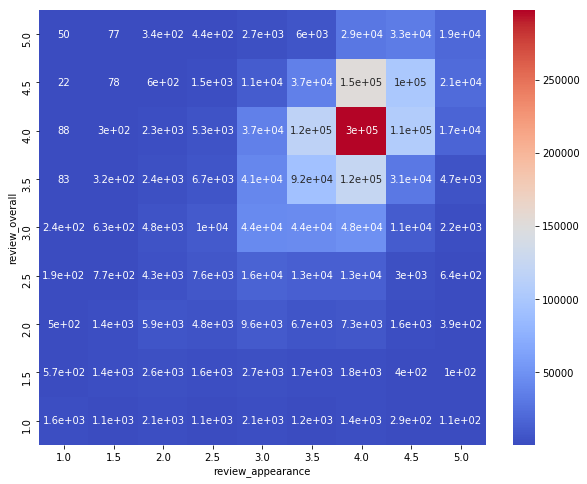

In [119]:
review_overall_vs_appearance_crosstab = pd.crosstab(beer_reviews.review_overall, beer_reviews.review_appearance)
plt.figure(figsize = (10, 8))
ax = sns.heatmap(review_overall_vs_appearance_crosstab, annot = True, cmap = "coolwarm")
ax.invert_yaxis()

In [122]:
wine_reviews = pd.read_csv("data/winemag-data_first150k.csv", index_col = 0)

In [123]:
wine_reviews.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [125]:
wine_reviews.shape

(150930, 10)

In [124]:
wine_reviews.dtypes

country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

In [129]:
top_wine_styles = wine_reviews.groupby("variety").size().sort_values(ascending = False).head(10)
top_wine_styles

variety
Chardonnay                  14482
Pinot Noir                  14291
Cabernet Sauvignon          12800
Red Blend                   10062
Bordeaux-style Red Blend     7347
Sauvignon Blanc              6320
Syrah                        5825
Riesling                     5524
Merlot                       5070
Zinfandel                    3799
dtype: int64

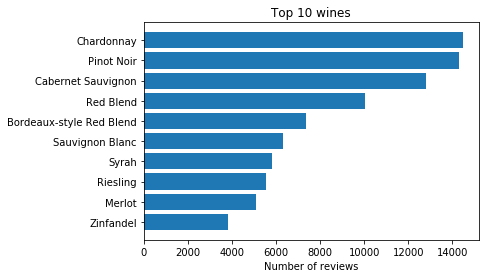

In [130]:
plt.barh(range(len(top_wine_styles.index)), top_wine_styles)

plt.title("Top 10 wines")
plt.xlabel("Number of reviews")
plt.yticks(range(len(top_wine_styles)), top_wine_styles.index)
plt.gca().invert_yaxis()
plt.show()

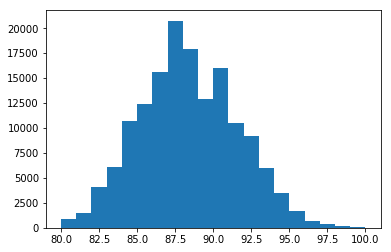

In [136]:
plt.hist(wine_reviews.points, bins = 20)
plt.show()

In [137]:
wine_reviews.points.mean()

87.8884184721394

In [138]:
wine_reviews.points.median()

88.0

In [139]:
wine_reviews.points.mode()

0    87
dtype: int64

In [140]:
wine_reviews.points.skeww()

0.14283263376595492

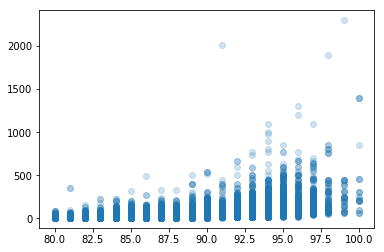

In [145]:
plt.scatter(wine_reviews.points, wine_reviews.price, alpha = 0.2)

In [143]:
wine_reviews[wine_reviews.price == wine_reviews.price.max()]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
34920,France,"A big, powerful wine that sums up the richness...",NaN,99,2300.0,Bordeaux,Pauillac,NaN,Bordeaux-style Red Blend,Château Latour


In [147]:
highest_rated_wines = wine_reviews[wine_reviews.points == wine_reviews.points.max()]

In [148]:
len(highest_rated_wines)

24

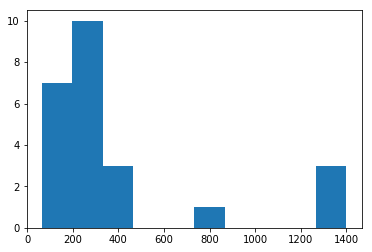

In [152]:
plt.hist(highest_rated_wines.price)
plt.show()

In [153]:
highest_rated_wines[highest_rated_wines.price > 600]

,country,description,designation,points,price,province,region_1,region_2,variety,winery
2145,France,"Full of ripe fruit, opulent and concentrated, ...",NaN,100,848.0,Bordeaux,Pessac-Léognan,NaN,Bordeaux-style White Blend,Château Haut-Brion
26296,France,A wine that has created its own universe. It h...,Clos du Mesnil,100,1400.0,Champagne,Champagne,NaN,Chardonnay,Krug
51886,France,A wine that has created its own universe. It h...,Clos du Mesnil,100,1400.0,Champagne,Champagne,NaN,Chardonnay,Krug
83536,France,A wine that has created its own universe. It h...,Clos du Mesnil,100,1400.0,Champagne,Champagne,NaN,Chardonnay,Krug


In [160]:
for (country, description), data in highest_rated_wines.groupby(["country", "description"]):
    print(country)
    print(data.price)

Australia
19355     300.0
84035     300.0
119195    300.0
Name: price, dtype: float64
France
26296    1400.0
51886    1400.0
83536    1400.0
Name: price, dtype: float64
France
2145    848.0
Name: price, dtype: float64
Italy
24151     460.0
41521     460.0
119521    460.0
Name: price, dtype: float64
Italy
111087    210.0
138867    210.0
Name: price, dtype: float64
Italy
28954    195.0
78004    195.0
Name: price, dtype: float64
US
92916    215.0
Name: price, dtype: float64
US
98647     100.0
122767    100.0
Name: price, dtype: float64
US
114272    245.0
143522    245.0
Name: price, dtype: float64
US
19354     65.0
84034     65.0
119194    65.0
Name: price, dtype: float64
US
89399     200.0
137099    200.0
Name: price, dtype: float64


In [161]:
top_rated_wines = wine_reviews[wine_reviews.points > 95]

In [162]:
top_rated_wines.country.unique()

array(['US', 'Spain', 'France', 'Italy', 'Australia', 'Austria',
       'Portugal', 'Hungary', 'Germany', 'Argentina'], dtype=object)